# Visualizing Text Data

### What Makes Visualizing Text Data Different?

1. **High Dimensionality**: Text data often comes in a high-dimensional format. A single document or piece of text can contain hundreds or thousands of unique words (features), making it challenging to visualize directly.

2. **Unstructured Data**: Unlike numerical or categorical data, text data is unstructured, requiring more sophisticated pre-processing techniques to transform it into a useful format for analysis.

3. **Sparsity**: Text data matrices are typically sparse. Most elements are zero, which poses challenges for visualization.

4. **Lack of Inherent Order**: Words in a text don't have an inherent order of importance unless processed to determine such an order.

5. **Semantics**: The meaning carried by words and their context often needs to be captured for effective visualization, requiring methods like sentiment analysis, topic modeling, or word embeddings.

6. **Multilevel Features**: Texts can be described by both the words they contain and metadata like author, time of creation, or source, which may also be essential for analysis and visualization.

However, much of the data we encounter in the world is text data, so it's helpful to learn some ways to visualize relationships in text.  We'll discuss three options in this lesson, but know that there are many many more ways to look at text data.


## Natural Language Processing

Working with text data falls under the heading of Natural Language Processing (NLP), which is a subfield of artificial intelligence (AI) and linguistics that focuses on the interaction between computers and humans through natural language. The primary aim of NLP is to enable machines to understand, interpret, and generate human language in a way that is valuable.

### Brief History:

1. **1950s:** The dawn of NLP is often associated with Alan Turing’s question, “Can machines think?” He introduced the Turing test to determine a machine's ability to exhibit intelligent behavior indistinguishable from a human.
  
2. **1960s:** The first attempts at machine translation took place, driven by the Cold War needs. These were rule-based systems, attempting to directly translate words from one language to another. The ALPAC report in 1966 criticized the lack of progress and led to a significant reduction in funding for machine translation research.

3. **1970s-1980s:** The focus shifted to rule-based approaches in various NLP tasks, including parsing. Noam Chomsky's linguistic theories, especially the idea of a universal grammar, were influential. This period also saw the birth of ELIZA, a primitive chatbot that could simulate conversation based on pattern matching.

4. **1990s:** Statistical NLP emerged as an alternative to rule-based systems. This period saw increased use of probabilistic models and data-driven methods, with the Brown Corpus playing a crucial role in the development of statistical methods.

5. **2000s:** The availability of vast amounts of digital data and powerful computational resources led to the rise of machine learning approaches in NLP. Algorithms like Latent Dirichlet Allocation (LDA) for topic modeling and Conditional Random Fields (CRFs) for sequence modeling became popular.

6. **2010s:** Deep learning began to dominate NLP, with neural network architectures like Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM) networks, and Transformer architectures (e.g., BERT, GPT) achieving state-of-the-art results on various tasks. Transfer learning and pre-trained language models became the standard for many NLP applications.

### Key Areas in NLP:

1. **Machine Translation:** Automatically translating text from one language to another.
  
2. **Sentiment Analysis:** Determining the mood or sentiment expressed in a piece of text.
  
3. **Speech Recognition:** Translating spoken language into written form.
  
4. **Information Retrieval:** Finding relevant documents or data based on queries, e.g., search engines.
  
5. **Text Summarization:** Creating concise summaries of longer texts.
  
6. **Chatbots & Conversational Agents:** Simulating human-like conversation.

7. **Named Entity Recognition:** Identifying and classifying named entities (e.g., names, locations) in text.

8. **Topic Modeling:** Identifying topics present in a corpus.

### Significance:

NLP holds significance in various domains, from assisting in clinical diagnoses based on patient records, to powering recommendation systems in e-commerce, to facilitating real-time multilingual conversations.

As with many areas in AI, challenges in NLP arise from the complexity and variability of human language. Homonyms, sarcasm, cultural context, and evolving language use can all confound simple computational methods. However, ongoing research in NLP continues to push the boundaries of what machines can understand and generate in terms of human language.

## Yelp reviews

In this lesson we are going to explore visualizing the text of a random subset of 2000 Yelp business reviews.  

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('assets/yelp_subset.csv')

#Here's a cool data entineering trick.  You can use .str.contains to identify pieces of text in the entry of a column of a DataFrame.
#case=False means we'll take sushi, Sushi or SUSHI
#na = False means we drop rows where the value of the entire category is NaN


df.head()

,review_id,user_id,business_id,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,zsbVXbCsycrTWkVlsKsVOg,u3NDqJr25UwYeXZypxJcqw,xBkXnzbctPGWG86L27GNFQ,2015-01-03,We brought our Doxie to Dr. Scholten for serio...,0,0,1,"""Hopi Animal Hospital""",NaN,"""5533 E Bell Rd, Ste 101""",Scottsdale,AZ,85254,33.639916,-111.961780,4.5,30,1,Pet Services;Pet Sitting;Pets;Veterinarians
1,d3iCvvJsJZs4U-ZFfq_pSA,DxHP0hTWS9Jpd-xSVCMYAg,JDjOobEd_Tm6Z06YRmWkbg,2008-05-13,"First, I'm a regular here. Sunday afternoons a...",5,3,5,"""Charlie's""",NaN,"""727 W Camelback Rd""",Phoenix,AZ,85013,33.508967,-112.083610,3.0,158,1,Bars;Nightlife;Dance Clubs;Gay Bars
2,yTS2FOyhmRHgwAXSG8muiQ,-aYO8Ga4U5hrwxV7y1IaiA,qiRyyRWt6jmAxcoVW0-WHA,2015-08-02,"Best AYCE in Mississauga. For an AYCE, their s...",6,0,1,"""Heart Sushi""",East Credit,"""815 Britannia Road W, Unit 2""",Mississauga,ON,L5V 2X8,43.610533,-79.698421,3.5,278,1,Chinese;Japanese;Buffets;Restaurants;Sushi Bars
3,W1PG83hPCogZdLlstltWZw,EJLsnsI53YKBHq9te2KSiQ,t67GMPZ0cv_ItKlID-JFiQ,2013-04-10,"Love it! It's a nice quick, inexpensive & tast...",0,1,0,"""Banzo""",NaN,"""2105 Sherman Ave""",Madison,WI,53704,43.101672,-89.364595,4.5,286,1,Food;Mediterranean;Food Trucks;Restaurants
4,Q8IuYiUzeK-Uc8mK-luL3w,gknq0IAq9jaSlotJ465FGw,6P-JmU0VW-qhYq7It1wowg,2014-11-10,Dont eat here! Doesnt even taste like pho here...,0,0,0,"""Pho 68""",NaN,"""2025 N Dobson Rd""",Chandler,AZ,85224,33.336151,-111.874338,3.5,77,0,Vietnamese;Restaurants


We can see that the text of the review looks exactly like what you would read from a review online.  It doesn't naturally lend itself to being classified as categorical or quantitative or viewed over space or time.  

However, there are ways that we can learn about pattenrns in the text.  For example, it would be reasonable to think that different words are more likely to appear in really good (5-star) reviews than in really bad (low-star reviews).  Perhaps "terrible" appears much more in low-star reviews.  A 5-star restaurant might be "terribly good", but there are probably a lot more "terribles" in low-star than 5-star reviews.


## Word clouds

A **word cloud**, also known as a tag cloud or text cloud, is a visual representation of text data. It displays a list of words, with the importance of each word being represented by its font size, color, or other visual distinctions. Typically, more frequently appearing words are shown in a larger font size and often in a more distinct color, while less frequent words are displayed in smaller fonts.

Word clouds are useful for quickly perceiving the most prominent terms in a piece of text and can be a good starting point in text analysis to identify key themes or terms. They are often used to visualize the most frequent terms in datasets like surveys, feedback, reviews, speeches, and more.  You've probably seen them before.

It would be difficult to make a word cloud on our own; however, Python comes to the rescue with the `wordcloud library`.  


Positive Reviews:


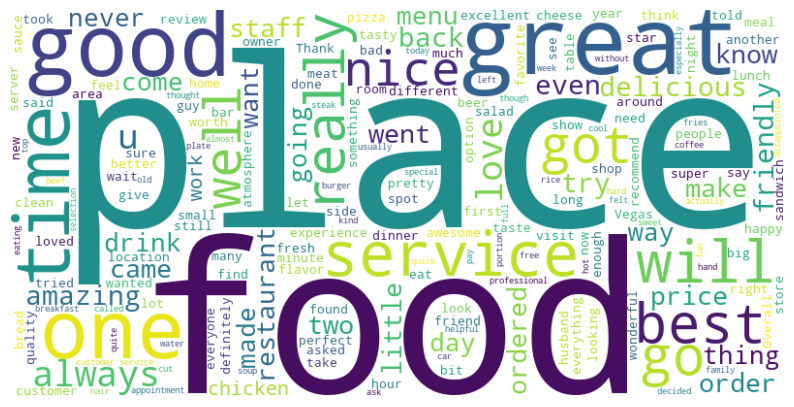

Negative Reviews:


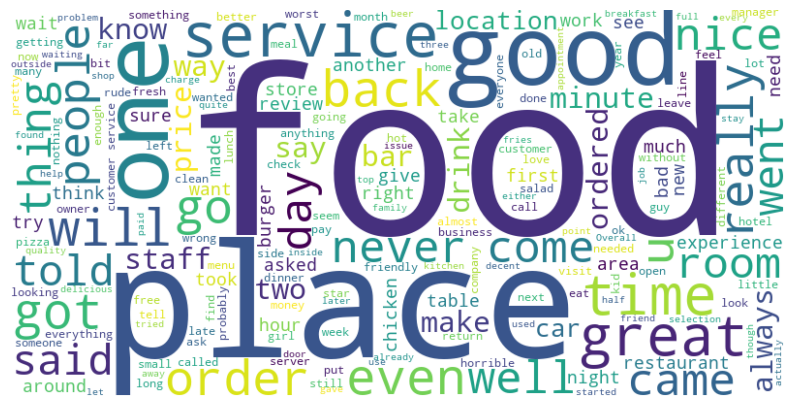

In [2]:
#%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# This sticks the text of all the positive reviews together and all the negative reviews together in two long strings separated by spaces
positive_reviews = ' '.join(df[df['stars'] >= 4]['text'])
negative_reviews = ' '.join(df[df['stars'] <= 3]['text'])

# Generate word clouds

print("Positive Reviews:")
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_reviews)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


print("Negative Reviews:")
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_reviews)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

This makes a nice visual, but of course there are limitations.  Words like "food" and "place" show up a lot but don't really give us insight into the sentiment of the reviewer.  Because each word is being taken independently without context a word like "good" shows up in the bad review word cloud, but it might have been part of a review that said "not very good".  We have no way to know.  On the other hand, the good review word cloud has a much bigger "good" and the bad review cloud has a much bigger "wrong" and "spotty".

Concerns about using word clouds as a visualization include:

- **Lack of Precision**: Word clouds give a general idea about data but don't provide precise frequency counts.
  
- **Context Loss**: Words are displayed outside of their original context, which can lead to misinterpretations.

- **Overemphasis on Common Words**: Without proper preprocessing, common words (like "and", "the", "is") can dominate the visualization unless they are removed or filtered out.


## N-grams and stop words

Let's see what happens when we make the same figure removing common English words ("stop words") and looking at pairs of words (bi-grams).  

Positive Reviews:


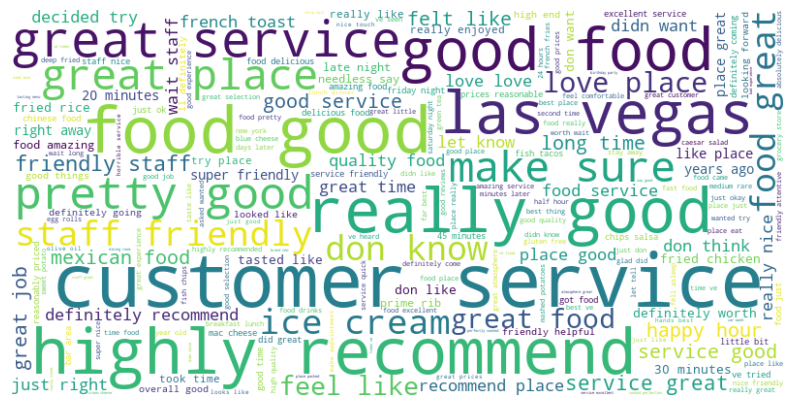

Negative Reviews:


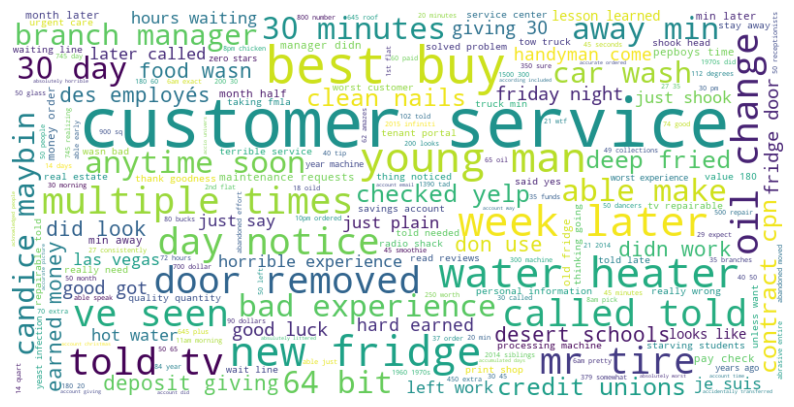

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 

# Filter for positive and negative reviews within the hotel/motel data
positive_reviews = df[df['stars'] >= 3]['text']
negative_reviews = df[df['stars'] <= 2]['text']

# Get the default English stopwords list from scikit-learn
additional_stop_words = ['00', '000', '10', '11', '12', '15', '25', '100', '150', '1000'] 
my_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
my_stop_words = list(my_stop_words)

# Setup CountVectorizer with the custom stopwords
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words=my_stop_words)


# Generate bigrams for positive reviews
positive_bigrams = vectorizer.fit_transform(positive_reviews)
positive_bigram_features = vectorizer.get_feature_names_out()
positive_bigram_counts = positive_bigrams.sum(axis=0).tolist()[0]
positive_bigram_dict = dict(zip(positive_bigram_features, positive_bigram_counts))

# Generate bigrams for negative reviews
negative_bigrams = vectorizer.fit_transform(negative_reviews)
negative_bigram_features = vectorizer.get_feature_names_out()
negative_bigram_counts = negative_bigrams.sum(axis=0).tolist()[0]
negative_bigram_dict = dict(zip(negative_bigram_features, negative_bigram_counts))

# Create and configure word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_bigram_dict)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_bigram_dict)

# Function to plot the word cloud
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Display the word clouds
print("Positive Reviews:")
plot_wordcloud(positive_wordcloud)
print("Negative Reviews:")
plot_wordcloud(negative_wordcloud)



Positive Reviews:


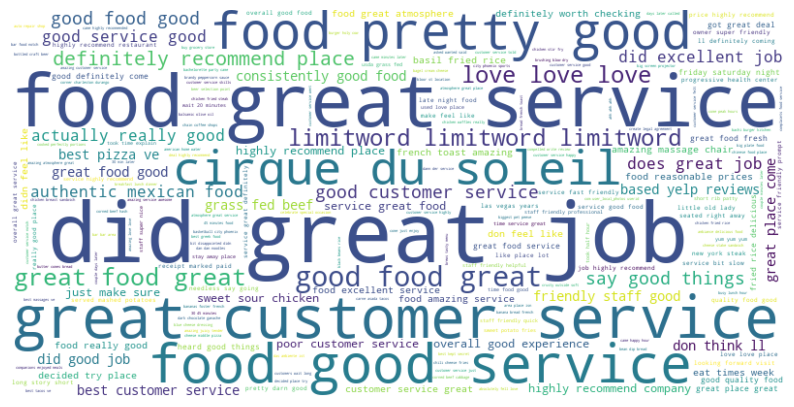

Negative Reviews:


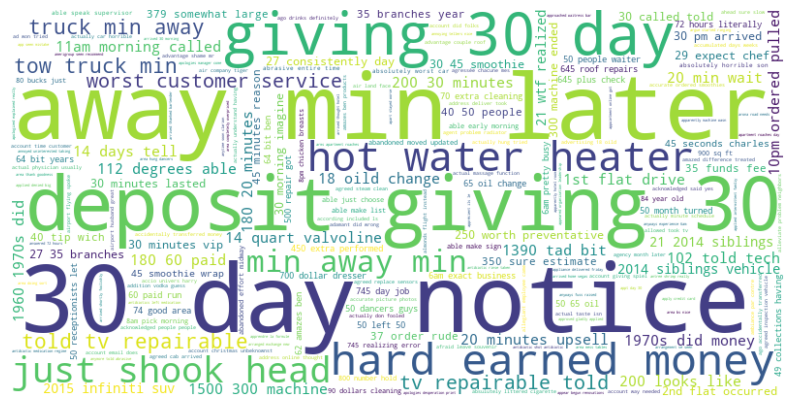

In [5]:
# And trigrams

# Get the default English stopwords list from scikit-learn
additional_stop_words = ['00', '000', '10', '11', '12', '15', '25', '100', '150', '1000'] 
my_stop_words = text.ENGLISH_STOP_WORDS.union(additional_stop_words)
my_stop_words = list(my_stop_words)

# Setup CountVectorizer with the custom stopwords
vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words=my_stop_words)


# Generate bigrams for positive reviews
positive_bigrams = vectorizer.fit_transform(positive_reviews)
positive_bigram_features = vectorizer.get_feature_names_out()
positive_bigram_counts = positive_bigrams.sum(axis=0).tolist()[0]
positive_bigram_dict = dict(zip(positive_bigram_features, positive_bigram_counts))

# Generate bigrams for negative reviews
negative_bigrams = vectorizer.fit_transform(negative_reviews)
negative_bigram_features = vectorizer.get_feature_names_out()
negative_bigram_counts = negative_bigrams.sum(axis=0).tolist()[0]
negative_bigram_dict = dict(zip(negative_bigram_features, negative_bigram_counts))

# Create and configure word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_bigram_dict)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_bigram_dict)

# Function to plot the word cloud
def plot_wordcloud(wordcloud):
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Display the word clouds
print("Positive Reviews:")
plot_wordcloud(positive_wordcloud)
print("Negative Reviews:")
plot_wordcloud(negative_wordcloud)

## Sentiment

Another way to look at the data is to see how different words factor into the overall sentiment of a review.  There are different ways to do this, but one way is by using the textblob library (Python has tons of NLP libraries) to compute the sentiment of each review.  Sentiment can be positive (a positive value), negative (a negative value) or neutral (a value at or near 0).  

Interestingly, the sentiment calculated by textblob doesn't align perfectly (though it does generally match up) with the star ratings given by the users.  

Below graph the distribution of sentiment for four words: ""disgusting", "delicious", "overpriced", and "delightful".  You can think of the curved graphs in the visualization like the outline of the top of a histogram.  The highest point of the curved line indicates the most common sentiment for that term.


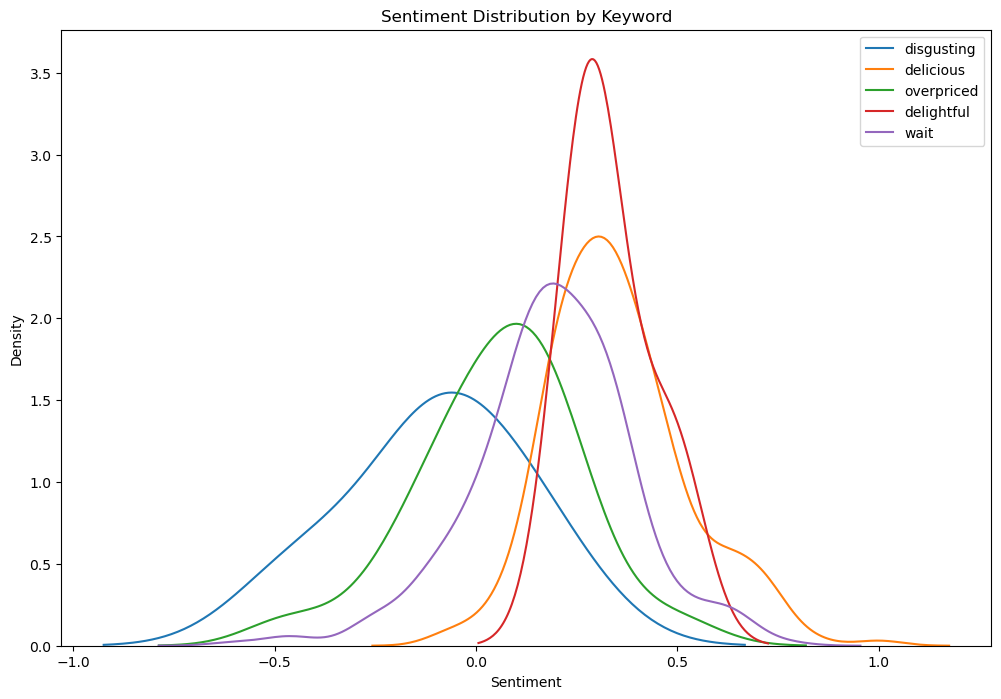

In [8]:
#%pip install textblob
from textblob import TextBlob

df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

keywords = ["disgusting", "delicious", "overpriced", "delightful", "wait"]

# Filter reviews based on the presence of keywords and compute sentiment for each keyword
sentiments = {}
for keyword in keywords:
    sentiments[keyword] = df[df['text'].str.contains(keyword, case=False, na=False)]['sentiment']

# Plot
plt.figure(figsize=(12, 8))
for keyword, sentiment in sentiments.items():
    sns.kdeplot(sentiment, label=keyword)
    
plt.title('Sentiment Distribution by Keyword')
plt.xlabel('Sentiment')
plt.legend()
plt.show()


We can see that the sentiment for both "delightful" and "delicious" is almost totally positive.  "Disgusting" is negative, but not completely, and "overpriced" actually trends positive.  

Take some time to experiment with the words plotted in the graphic and see what the overall sentiment of the reviews they come from is.  If a word isn't in the text of the reviews, it won't show up on the graph.

We can also look at sentiment by star rating.  Do the two always line up?

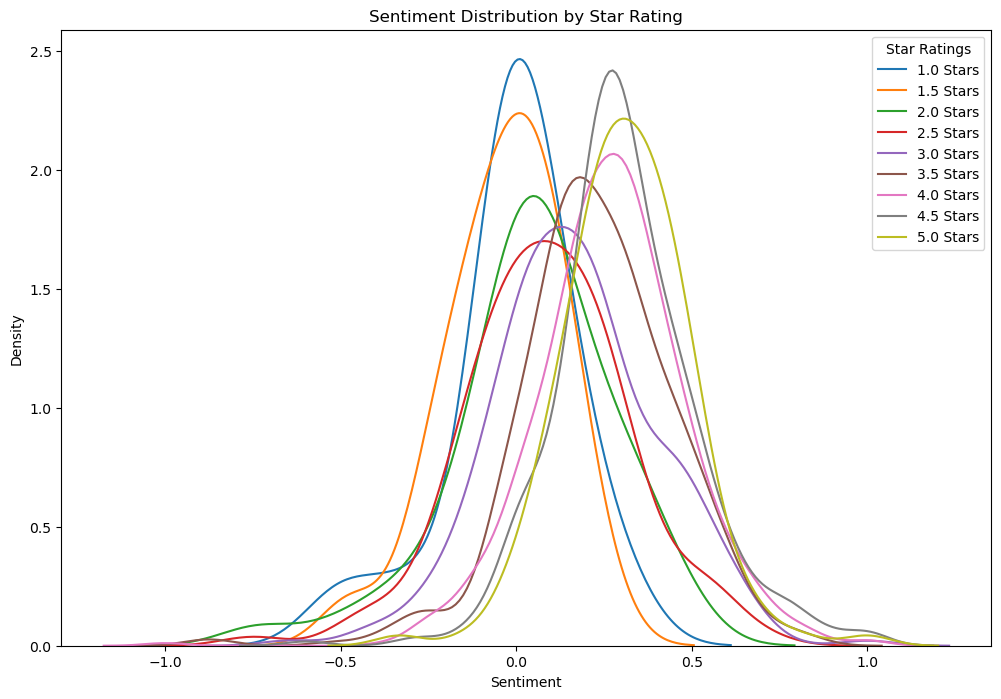

In [59]:
#Sentiment by star rating

# Group by 'stars' and collect all sentiments into lists per star category
grouped_sentiments = df.groupby('stars')['sentiment'].apply(list)

# Plot
plt.figure(figsize=(12, 8))
for star, sentiment_list in grouped_sentiments.items():
    sns.kdeplot(sentiment_list, label=f"{star} Stars")

plt.title('Sentiment Distribution by Star Rating')
plt.xlabel('Sentiment')
plt.ylabel('Density')
plt.legend(title='Star Ratings')
plt.show()


## Review length

What if simply the length of the review - without even examining any of the words - provides a clue if the review is positive or negative?  Do people leave long reviews when they are really disappointed in an experience?  Or do they love to share praise?  We can plot the mean number of characters (letters, numbers, punctuation), in the reviews that earned different numbers of stars.

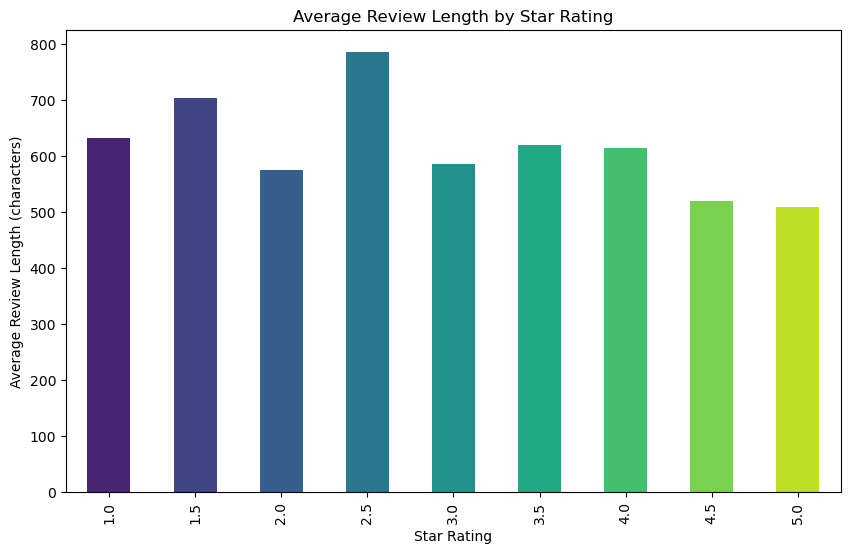

In [60]:
#Because the .len function is meant to be used on indivdual string input, .apply allows us to use the len function on every element of the feature 'text'

df['review_length'] = df['text'].apply(len)

#We then calculate the average review length by number of stars
avg_review_length = df.groupby('stars')['review_length'].mean()

#plotting using the Pandas built in bar chart with a color scheme from Seaborn.  Seaborn has lots of color palettes, so you can
#google and replace "viridis" with other options 

plt.figure(figsize=(10, 6))
avg_review_length.plot(kind='bar', color=sns.color_palette("viridis", len(avg_review_length)))
plt.title('Average Review Length by Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Average Review Length (characters)')
plt.show()

What do you notice about the review lengths?  What star rating has the longest reviews, on average?  Do 1-star reviews tend to be longer or shorter than 5-star reviews?

### Best Practices for Visualizing Text Data

1. **Simplicity is Key**: Given the high dimensionality, visual simplicity is often crucial for making insights accessible.

2. **Dimensionality Reduction**: Techniques like t-SNE, PCA, or UMAP (you'll learn more about these later) can be used to reduce the dimensionality of text data for visualization.

3. **Interactivity**: Text data often benefits from interactive visualizations that allow for exploration, such as clicking on a point in a scatter plot to see the associated text.

4. **Context Matters**: Always provide enough context to interpret the visualization correctly. For example, if you're displaying frequently occurring terms, knowing the data source, and the text's general context is crucial for interpretation.

5. **Multi-level Visualizations**: Sometimes, it helps to provide visualizations at different levels of granularity. For example, you could have one plot showing sentiment analysis at the document level and another at the sentence or paragraph level.

6. **Use of Color and Size**: Carefully use color and size to indicate different attributes like frequency or sentiment. But avoid overcomplicating the visual by using too many visual cues simultaneously.

7. **Comparative Visualizations**: Comparing text data across different categories, times, or conditions can often lead to more actionable insights.

8. **Text Annotations**: Because text data is inherently rich and unstructured, adding text annotations to describe specific points or trends in your plot can be especially helpful.

9. **Iterate and Refine**: Given the complexity of text data, you'll often need to iterate and refine your visualizations to ensure they're providing valuable insights.

10. **User Testing**: If the visualization is meant for a broader audience, user testing can be beneficial. This helps ensure that the visualization is not only accurate but also intuitive and insightful for the end-user.

## OK
There are many amazing uses for natural language processing.  We were able to touch on visualizing only a very few of them, but hopefully this gave you a sense of the power of data visualizations even for unstructured data like text.